

# Ford Bike Data Tribe Exploration
## by Mohamed Gamal

## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('combined_data.csv')

In [3]:
df.shape

(1863721, 14)

In [4]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [6]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


### What is the structure of your dataset?

Structure of dataset 1863721 trip data with 14 future of data catogrial of data 
user_type:(subscriber,customer)
bike_share_for_all_trip:(yes,No)
url :https://www.kaggle.com/nikitajain16/ford-go-bike-dataset-for-year-2018

### What is/are the main feature(s) of interest in your dataset?

I think Main feature of interest is duration_sec of trib from start staution to end station-usertype
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

features in the dataset do you think will help support your investigation into your feature(s) of interest start_time end_time
start station End Station Customer type 


# Data Assisment

<ul>
    <li>Start_time is object Must be convert to datetime typ</li>
    <li>End_Time is object must be to convert to date time type</li>
    <li> clean null value of gender ,member_birth_year,start_station_id and End_station_id</li>
    <li>drop column bike_share_for_all_trip,bike_id,end_station_longitude,end_station_latitude,start_station_longitude and start_station_latitude</li>
</ul>
    
<ul>
  
  <li> Add column Day of week and month for trip</li>
</ul>

# Clean

### make copy to clean

In [8]:
df_copy=df.copy()

### -convert start time and end time to datetime type

In [9]:
df_copy['start_time']=pd.to_datetime(df_copy['start_time'])
df_copy['end_time']=pd.to_datetime(df_copy['end_time'])


### test

In [10]:
df_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
dtype: object

### clean null value of start_station_id and End_station_id


In [11]:
df_copy[df_copy['start_station_id'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.855,2018-06-30 22:31:24.593,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.511,2018-06-30 22:22:01.174,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes
623393,850,2018-06-30 22:01:25.585,2018-06-30 22:15:36.151,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No
623429,562,2018-06-30 21:52:05.118,2018-06-30 22:01:27.440,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No
623456,819,2018-06-30 21:37:34.506,2018-06-30 21:51:13.729,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860854,663,2018-12-02 09:47:44.116,2018-12-02 09:58:47.162,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4284,Customer,No
1861409,1141,2018-12-01 21:22:41.646,2018-12-01 21:41:42.727,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4256,Subscriber,No
1861570,753,2018-12-01 19:57:14.201,2018-12-01 20:09:47.858,NaN,NaN,37.41,-121.94,NaN,NaN,37.40,-121.93,4181,Subscriber,No
1862625,2244,2018-12-01 14:01:06.252,2018-12-01 14:38:30.895,NaN,NaN,37.41,-121.93,NaN,NaN,37.42,-121.96,4238,Customer,No


In [12]:


df_copy.drop( df_copy[df_copy['start_station_id'].isna()].index,inplace=True) 



### test

In [13]:
df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

### drop column bike_share_for_all_trip,bike_id,end_station_longitude,end_station_latitude,start_station_longitude and start_station_latitude

In [14]:
df_copy.drop(['bike_share_for_all_trip','bike_id','end_station_longitude','end_station_latitude','start_station_longitude' , 'start_station_latitude'],axis='columns', inplace=True)

test

In [15]:
df_copy.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id             float64
start_station_name            object
end_station_id               float64
end_station_name              object
user_type                     object
dtype: object

### Add column Day of week and month for trip

In [16]:
df_copy['start_hour'] = df_copy['start_time'].apply(lambda time: time.hour)
df_copy['day'] = df_copy['start_time'].apply(lambda time: time.strftime('%A'))
df_copy['month'] = df_copy['start_time'].apply(lambda time: time.month_name())
df_copy['period_day'] = 'morning'
df_copy['period_day'][(df_copy['start_hour'] >= 12) & (df_copy['start_hour'] <= 17)] = 'afternoon'
df_copy['period_day'][(df_copy['start_hour'] >= 18) & (df_copy['start_hour'] <= 23)] = 'night'

test

In [17]:
print(df_copy.month.value_counts().index)
print(df_copy.period_day.unique())
print(df_copy.day.unique())

Index(['October', 'July', 'June', 'August', 'September', 'May', 'November',
       'December', 'April', 'March', 'February', 'January'],
      dtype='object')
['night' 'afternoon' 'morning']
['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


In [18]:
df_clean=df_copy

# Storind Cleaning Data

In [19]:
df_clean.to_csv('Ford_clean.csv', index = False)

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec.

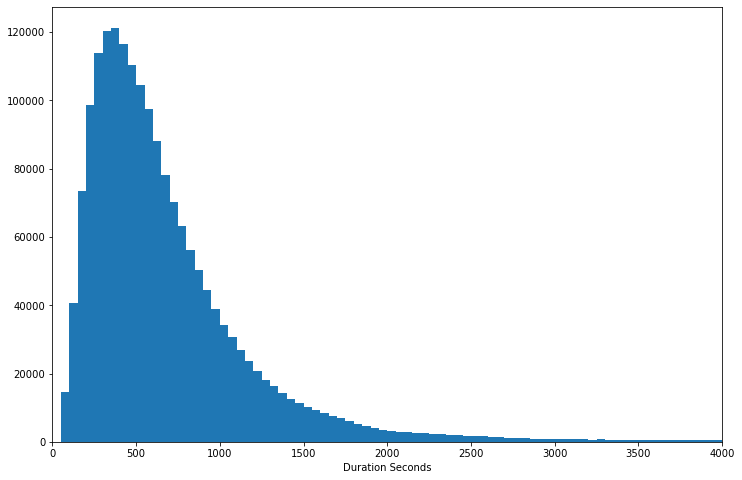

In [20]:
#High = (Q3) + 1.5 IQR
plt.figure(figsize=(12,8))
bins=np.arange(0,df_clean['duration_sec'].max()+10,50)
plt.hist(data = df_clean, x = 'duration_sec',bins=bins);
plt.xlim((0,4000))
plt.xlabel('Duration Seconds')
plt.show()

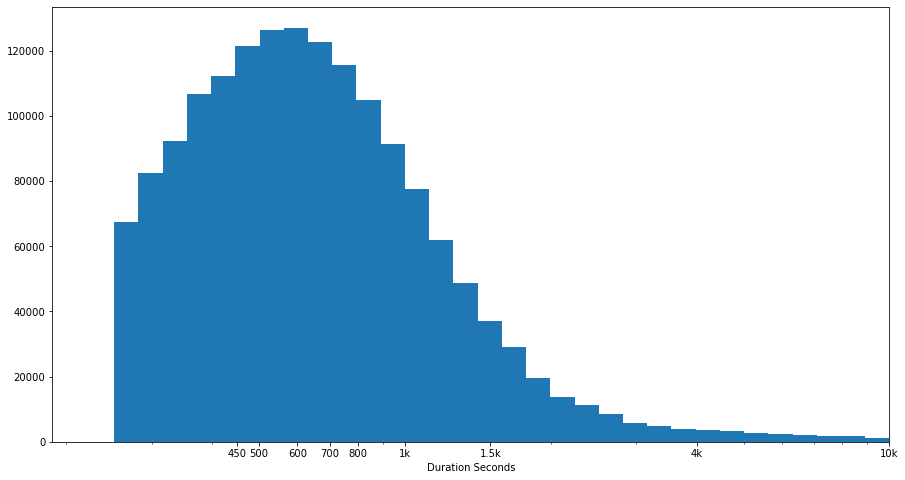

In [21]:
log_binsize = 0.05
plt.figure(figsize=(15,8))

bins = 10 ** np.arange(2.4, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data = df_clean, x = 'duration_sec',bins=bins);
plt.xscale('log')
plt.xlim((0,1e4))
plt.xticks([450,500,600,700,800,1000, 1500, 4000,10000], [450,500,600,700,800, '1k','1.5k','4k','10k'])

plt.xlabel('Duration Seconds')
plt.show()

After ploting histogram of durationtime Found after log values must furqancy time is between 600 sec and 650 sec that time of travel in most

In [22]:
def DrowbarVert(df,colname,labelfig):
    val_counts=df[colname].value_counts()
    DrowbarVert2(val_counts,labelfig)
def DrowbarVert2(val_counts,labelfig):
    plt.figure(figsize=(10,8))
    base_color = sb.color_palette()[0]
    sb.barplot(y=val_counts.index,x=val_counts.values,color=base_color)
    total=val_counts.values.sum()
    for i in range (val_counts.shape[0]):
        count = val_counts[i]
        pct_string = '{:0.1f}'.format(100*count/total)
        plt.text(count+1, i, pct_string, va='center')
    plt.xlabel(labelfig)
    
def Drowhoris(df,colname,labelfig):
    base_color = sb.color_palette()[0]
    sb.countplot(data=df, x=colname, color=base_color);
    val_counts = df[colname].value_counts()
    locs, labels = plt.xticks() 
    total=val_counts.values.sum()
    for loc, label in zip(locs, labels):

        count = val_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/total)
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.xlabel(labelfig)

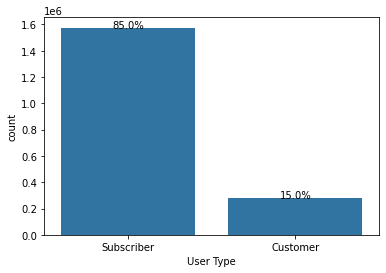

In [23]:

Drowhoris(df_clean,"user_type","User Type")

user type use trip allmost subscriber by 85% and customer 15%

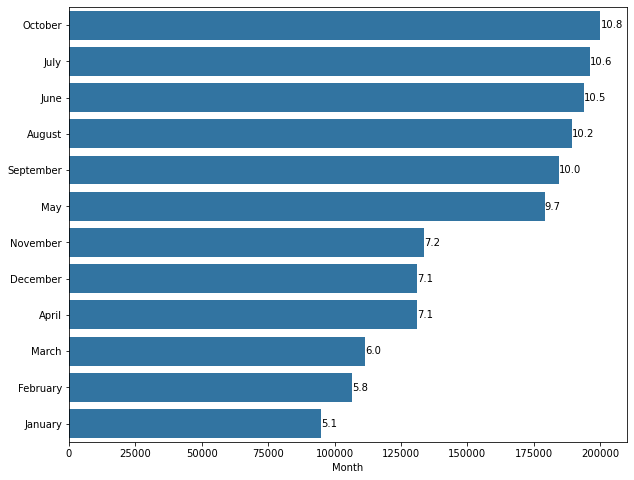

In [24]:

DrowbarVert(df_clean,"month","Month")

tribs in months from june to october hase high trebs count about other month

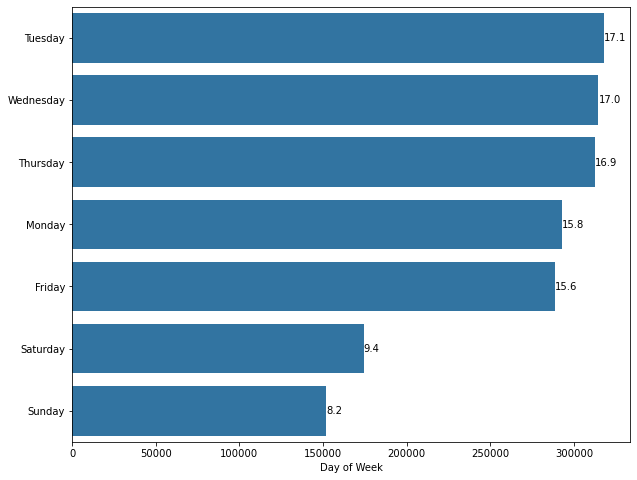

In [25]:
DrowbarVert(df_clean,'day','Day of Week')

During the weekdays Tuesday, Wednesday and Thursday the highest rates of trips and then Mondays and beer days and the least days of the week used for trips Saturday and Sunda

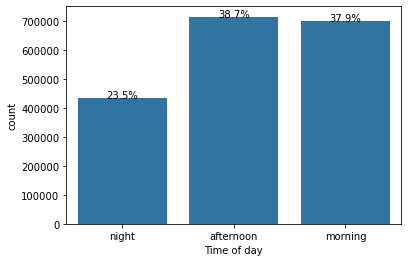

In [26]:
Drowhoris(df_clean,'period_day','Time of day')

During the day, morning and noon times are close in trips rates and decrease in night flights

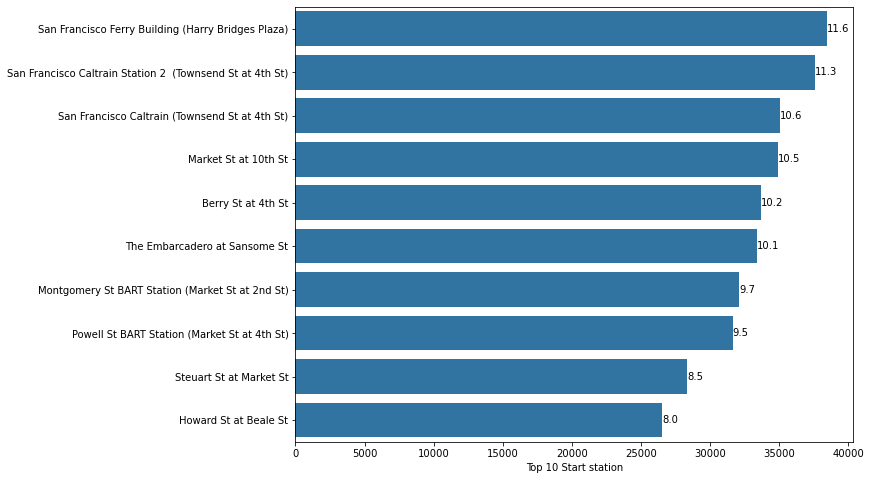

In [27]:
top_start_station=df_clean.start_station_name.value_counts()[:10]
base_color = sb.color_palette()[0]
DrowbarVert2(top_start_station,"Top 10 Start station")


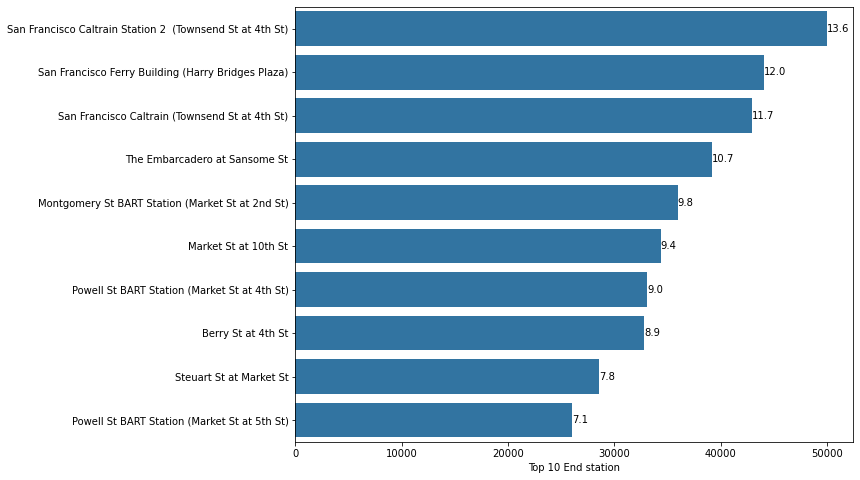

In [28]:
top_end_station=df_clean.end_station_name.value_counts()[:10]
DrowbarVert2(top_end_station,"Top 10 End station")

Between the starting stations and the end stations, the highest used stations are the same in varying proportions

In [29]:
df_clean.period_day.value_counts()

afternoon    716500
morning      700968
night        434482
Name: period_day, dtype: int64

In [30]:
df_clean.day.value_counts()

Tuesday      317540
Wednesday    314495
Thursday     312258
Monday       292878
Friday       288746
Saturday     174140
Sunday       151893
Name: day, dtype: int64

In [31]:
df_clean.month.value_counts()

October      200102
July         196038
June         193907
August       189250
September    184635
May          179125
November     133651
December     131171
April        131169
March        111382
February     106718
January       94802
Name: month, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

duration seconds distribution has long rang by outlier data has long range,so that i'm use log transformation to get most frequancy  trip between 550(9.2 Minuts) and 600 seconds (10minuts)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I do not have any features any distributions its allmost categorical feature but found that
,user type use trip allmost subscriber by 85% and customer 15%
,tribs in months from june to october hase high trebs count about other month
,During the weekdays Tuesday, Wednesday and Thursday the highest rates of trips and then Mondays and beer days and the least days of the week used for trips Saturday and Sunda
 and Between the starting stations and the end stations, the highest used stations are the same in varying proportions
 <br/>
I use start_date to get new feature in dataset like period of time in day and month and day of week to show any time or day effect on trip count
 

## Bivariate Exploration



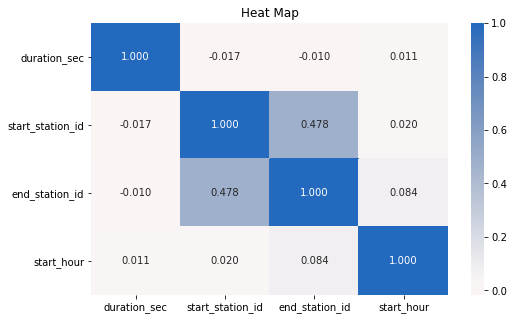

In [32]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heat Map')
plt.show()

by result on heat map no strong relation effective between  duration secondes and start station or end statoin ther relation but week

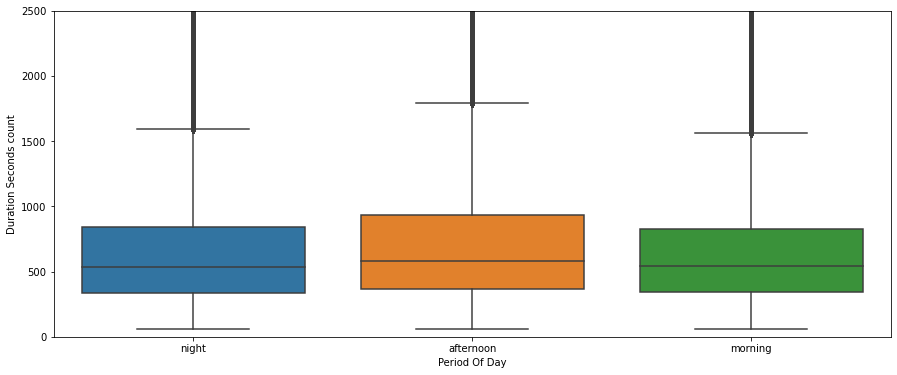

In [33]:

plt.figure(figsize=(15,6))
sb.boxplot(data = df_clean, x = 'period_day', y = 'duration_sec');
plt.xlabel('Period Of Day')
plt.ylabel('Duration Seconds count')
plt.ylim((0,2500))
plt.show()

Period of day thare big outlier rang,afternoon time heighr IQR and heighr ,Min Dueation seconds is same of all period time of day

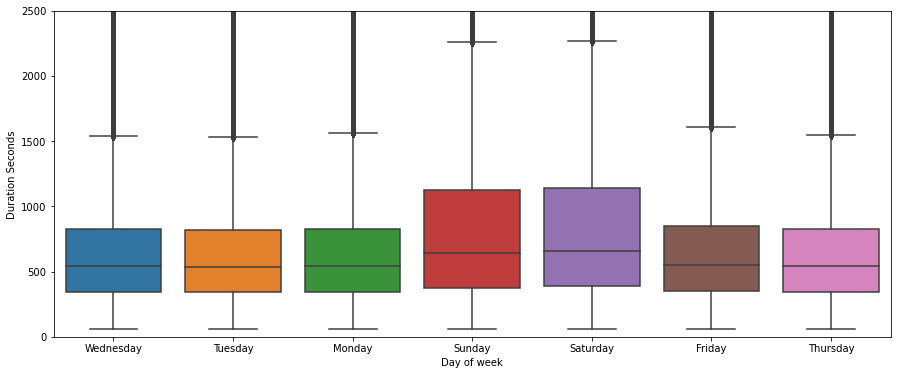

In [34]:
plt.figure(figsize=(15,6))
sb.boxplot(data = df_clean, x = 'day', y = 'duration_sec');
plt.xlabel('Day of week')
plt.ylabel('Duration Seconds')
plt.ylim((0,2500))
plt.show()

day of week heighr range in sunday and saturday and heighr mean of duration seconds

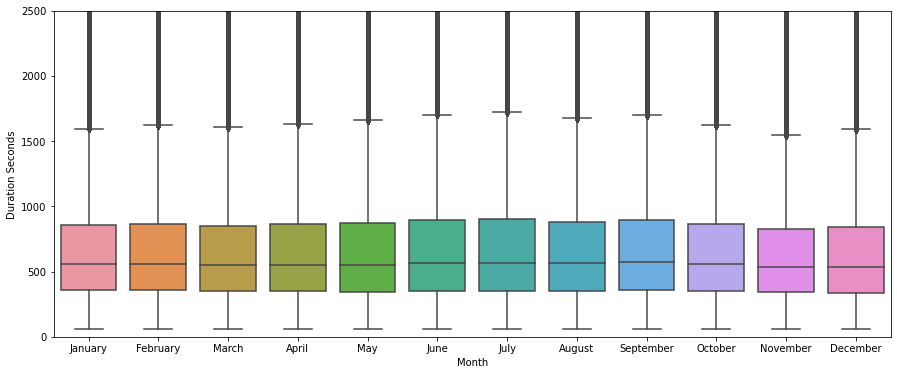

In [35]:
plt.figure(figsize=(15,6))
sb.boxplot(data = df_clean, x = 'month', y = 'duration_sec');
plt.xlabel('Month')
plt.ylabel('Duration Seconds')
plt.ylim((0,2500))
plt.show()

Month has big out outlier in duration seconds, in this plot avrege duration seconds is closer between months 

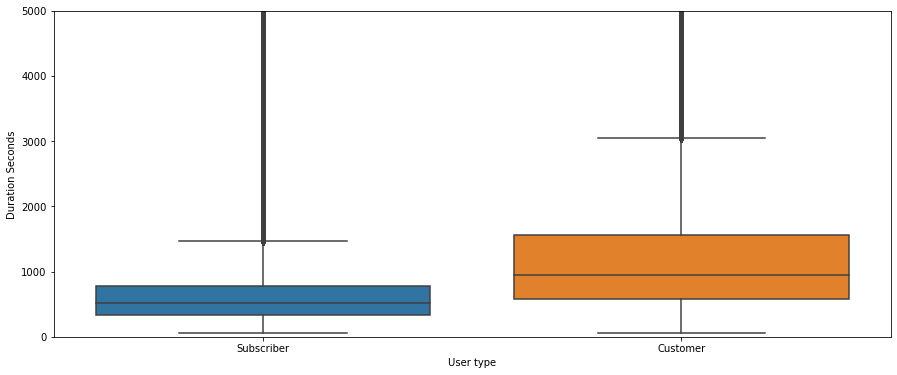

In [36]:
plt.figure(figsize=(15,6))
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec');
plt.xlabel('User type')
plt.ylabel('Duration Seconds')
plt.ylim((0,5000))
plt.show()

by user type avreg duration seconds for trip more highre than subscriber users

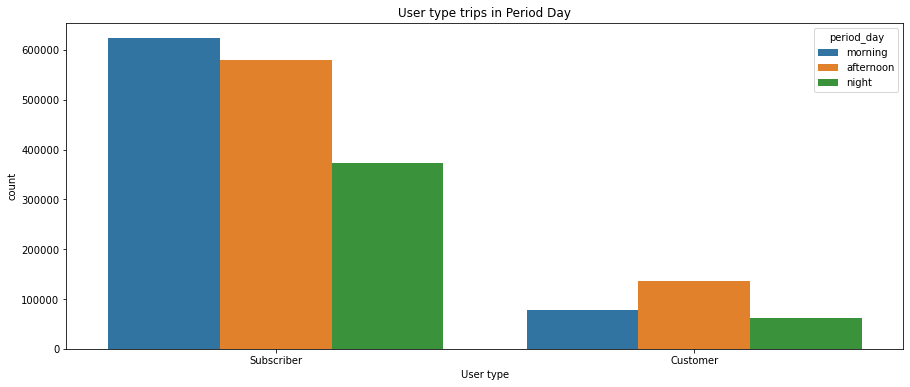

In [37]:
plt.figure(figsize=(15,6))
sb.countplot(data = df_clean, x = 'user_type', hue = 'period_day',hue_order=['morning','afternoon','night'])
plt.xlabel('User type')
plt.title('User type trips in Period Day')
plt.show()

by plot customer favorite afternoon trips but subscriper interest bt morning trips

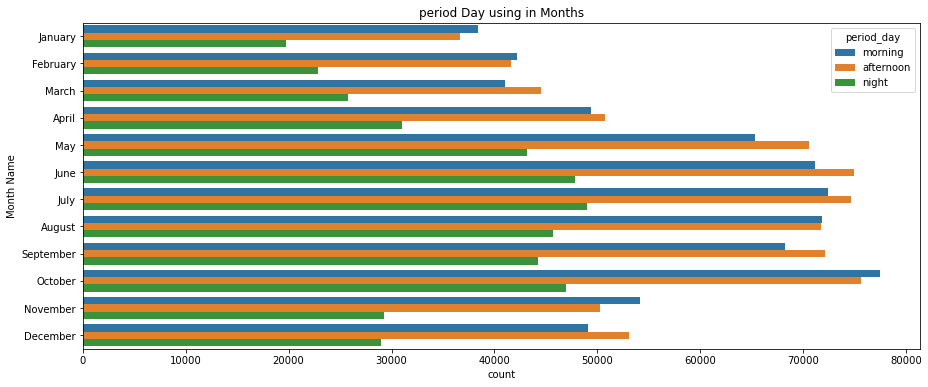

In [38]:
plt.figure(figsize=(15,6))
sb.countplot(data = df_clean, y = 'month', hue = 'period_day',hue_order=['morning','afternoon','night'])
plt.ylabel('Month Name')
plt.title('period Day using in Months')
plt.show()

in plot from may to october increes trip in period afternoon,but other month allmost morning is biger than other period

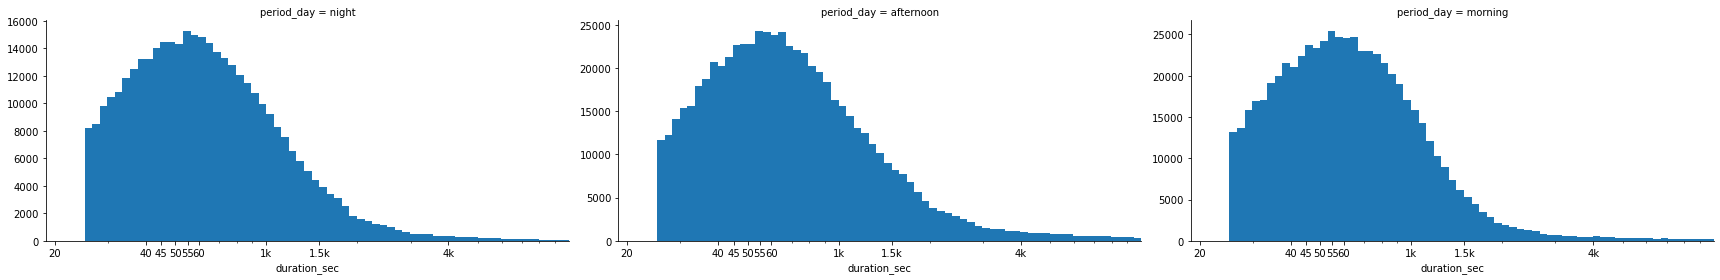

In [39]:

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)
log_binsize = 0.025


bin_edges = 10 ** np.arange(2.4, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)
g = sb.FacetGrid(data = df_clean, col = 'period_day', col_wrap=3, sharey=False,size=4, aspect=2)
g.map(plt.hist, 'duration_sec',bins=bin_edges).set(xscale = 'log');
g.set(xlim=(0, 1e4))
g.set(xticks = [200,400,450,500,550,600,1000, 1500, 4000], xticklabels = ['20','40','45','50','55','60','1k','1.5k','4k'])



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Period of day thare big outlier rang,afternoon time heighr IQR and heighr ,Min Dueation seconds is same of all period time of day,day of week heighr range in sunday and saturday and heighr mean of duration seconds,Month has big out outlier in duration seconds, in this plot avrege duration seconds is closer between months ,in plot from may to october increes trip in period afternoon,but other month allmost morning is biger than other period

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>user type customer favorit long trip than subscriper user

## Multivariate Exploration



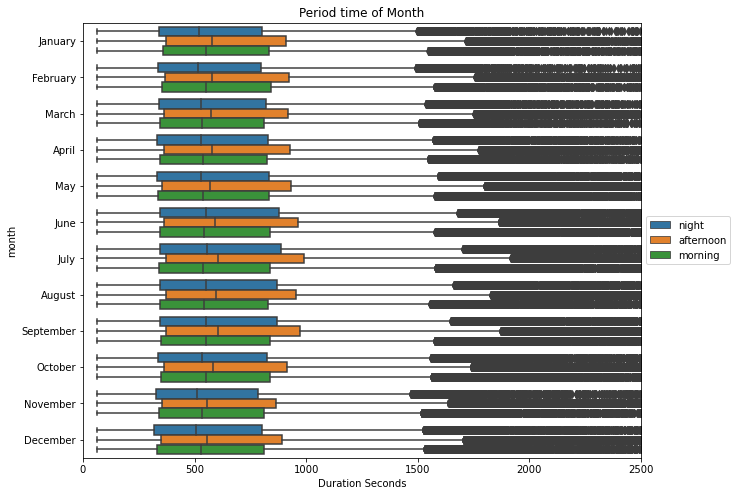

In [40]:
plt.figure(figsize=(10,8))
sb.boxplot(data = df_clean, y = 'month', x = 'duration_sec', hue = 'period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlim((0,2500))
plt.xlabel('Duration Seconds')
plt.title('Period time of Month')
plt.show()

in relation between months , Duration seconds of trip and period of day avreg trip of period of day in afternoon higher more than other period in all Months

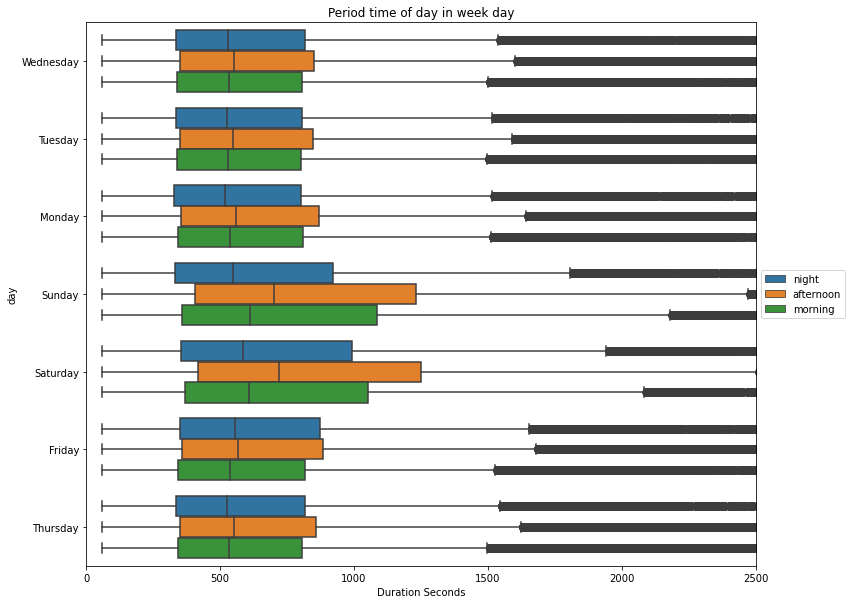

In [41]:
plt.figure(figsize=(12,10))
sb.boxplot(data = df_clean, y = 'day', x = 'duration_sec', hue = 'period_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlim((0,2500))
plt.xlabel('Duration Seconds')
plt.title('Period time of day in week day')
plt.show()

weekday trips avreg of duration seconds afternoon period is higher than other period and highr  on saturday and friday

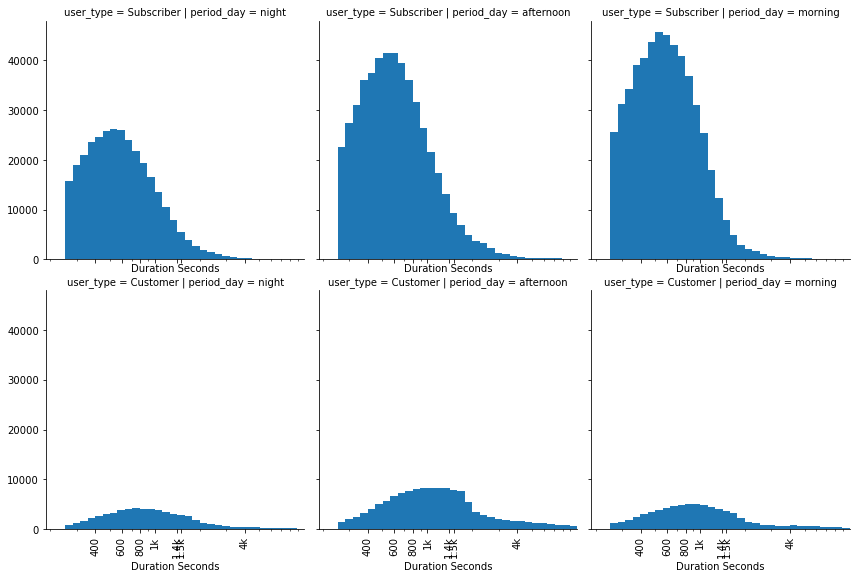

In [42]:
log_binsize = 0.05


bin_edges = 10 ** np.arange(2.4, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

g = sb.FacetGrid(data = df_clean, col = 'period_day',row='user_type',size=4 )
g.map(plt.hist, 'duration_sec',bins=bin_edges).set(xscale = 'log').set(xlim=(0,1e4));
g.set(xticks = [400,600,800,1000,1400, 1500, 4000], xticklabels = [400,600,800, '1k','1.4k','1.5k','4k'])
g.set(xlabel='Duration Seconds')

for ax in g.axes.flat:
    
    for label in ax.get_xticklabels():
        label.set_rotation(90)


duration seconds histogram on user type subscriber in period of day most frequancy night 500 seconds ,afternoon between 550 and 650 and morning550 and 600
user type costomer night from 800 to 900 ,afternoon from 900 to 1400 seconds and morning from 800 to 1000 seconds

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> afternoon trip is highr than other period of day on monthes and increas trip on days of week sunday and starday

### Were there any interesting or surprising interactions between features?

> Increas time of trip user type costomer than subscrip user

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

# refrense

https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas

https://github.com/mwaskom/seaborn/issues/867

https://stackoverflow.com/questions/54151721/how-to-set-ticks-after-log-scale-in-seaborn-facetgrid

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_FordBike.ipynb'])

1